In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1161447317.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  general_data = pd.read_csv('general.csv', delimiter=';')
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1161447317.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rko_used_clients['product_usage_index'] = rko_used_clients[bank_product_usage_columns].mean(axis=1)
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1161447317.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

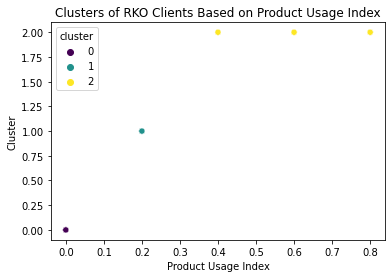

In [32]:

# Загрузка данных
general_data = pd.read_csv('general.csv', delimiter=';')
rko_data = pd.read_csv('RKO-activity.csv', delimiter=';')
aq_data = pd.read_csv('aquiring-activity.csv', delimiter=';')

# Фильтрация данных для включения только активных пользователей РКО
rko_used_clients = general_data[general_data['rko'] > 0]
aq_used_clients = general_data[general_data['клиент'].isin(aq_data["клиент"])]

# Выбор колонок, относящихся к использованию других банковских продуктов
bank_product_usage_columns = [
                              'deposit', 'inkass', 'acquiring_torg', 'zarplat_projects', 'samoinkass']

# Создание новой фичи - индекса использования продуктов
rko_used_clients['product_usage_index'] = rko_used_clients[bank_product_usage_columns].mean(axis=1)

# Нормализация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rko_used_clients[['product_usage_index']])

# Применение K-means кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
rko_used_clients['cluster'] = kmeans.fit_predict(scaled_features)

# Визуализация кластеров
sns.scatterplot(data=rko_used_clients, x='product_usage_index', y='cluster', hue='cluster', palette='viridis')
plt.title('Clusters of RKO Clients Based on Product Usage Index')
plt.xlabel('Product Usage Index')
plt.ylabel('Cluster')
plt.show()


In [ ]:
# Plotting the churn rate over time with data point values
plt.figure(figsize=(15, 6))
ax = churn_rate_rko.plot(kind='bar', color='blue')
plt.title('Churn Rate Over Time for RKO Dataset')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data point values on the graph
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


,клиент,Сегмент id,Кластер,Средний возраст работников,Тип организации,bank_1,bank_2,bank_3,bank_4,bank_5,...,deposit,inkass,acquiring_torg,rko,zarplat_projects,samoinkass,"ОКВЭД, основная деятельность","ОКВЭД, дополнительные",Наименование основного ОКВЭД,Компания в стадии ликвидации
0,client_5139,0,2,[40-48),ИП,0,0,0,0,0,...,0,0,0,1,0,0,47.91,NaN,Торговля розничная по почте или по информацион...,0
1,client_16112,0,5,[0-27),ИП,0,0,0,0,0,...,0,0,0,1,1,0,46.90,"46.12,43.29,81.21,43.39,52.24,43.21,46.74,52.2...",Торговля оптовая неспециализированная,0
2,client_21152,0,5,[34-40),ИП,0,0,0,0,0,...,0,0,0,1,0,0,96.02.1,96.02.2,Предоставление парикмахерских услуг,0
3,client_15302,0,1,[40-48),ИП,0,0,0,0,0,...,0,0,1,1,1,0,46.90,"25.99,46.74,25.99.1",Торговля оптовая неспециализированная,0
4,client_30885,0,6,>=48,ИП,0,0,0,0,0,...,0,0,1,1,0,0,47.71.1,"47.75,47.71.7,47.71.5,47.51,47.71,47.75.1,47.7...","Торговля розничная мужской, женской и детской ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48418,client_21483,0,1,[27-34),ИП,0,0,0,0,0,...,0,0,0,1,0,0,45.20,"45.40,45.40.5,47.19,45.20.2,45.31,45.32,45.20....",Техническое обслуживание и ремонт автотранспор...,0
48419,client_40397,0,1,[27-34),ИП,0,0,0,0,0,...,0,0,1,1,1,0,47.65,47.19,Торговля розничная играми и игрушками в специа...,0
48420,client_4588,0,10,[40-48),ИП,0,0,0,0,0,...,0,0,0,1,0,0,71.20.9,"43.31,43.22,43.33,43.29,81.21,43.32,43.39,43.2...","Деятельность по техническому контролю, испытан...",0
48421,client_17159,0,1,>=48,ИП,0,0,0,0,0,...,0,0,0,1,0,0,49.42,NaN,Предоставление услуг по перевозкам,0


In [38]:

# Converting data to boolean (active/inactive)
rko_data_bool = rko_data.drop('клиент', axis=1) > 0
aq_data_bool = aq_data.drop('клиент', axis=1) > 0

# Initializing the churn rate series for the new dataset
churn_rate_rko = pd.Series(index=rko_data_bool.columns)
churn_rate_aq = pd.Series(index=aq_data_bool.columns)

# Calculating the churn rate for each month according to the user's method

for i in range(1, len(aq_data_bool.columns)):
    prev_month = aq_data_bool.columns[i - 1]
    current_month = aq_data_bool.columns[i]

    # Number of active customers in the previous month
    active_prev_month_count = aq_data_bool[prev_month].sum()

    # Number of customers who left in the current month
    customers_left_count = aq_data_bool[prev_month] & ~aq_data_bool[current_month]
    customers_left_count = customers_left_count.sum()

    # Calculating churn rate
    churn_rate_aq[current_month] = customers_left_count / active_prev_month_count if active_prev_month_count != 0 else 0


for i in range(1, len(rko_data_bool.columns)):
    prev_month = rko_data_bool.columns[i - 1]
    current_month = rko_data_bool.columns[i]

    # Number of active customers in the previous month
    active_prev_month_count = rko_data_bool[prev_month].sum()

    # Number of customers who left in the current month
    customers_left_count = rko_data_bool[prev_month] & ~rko_data_bool[current_month]
    customers_left_count = customers_left_count.sum()

    # Calculating churn rate
    churn_rate_rko[current_month] = customers_left_count / active_prev_month_count if active_prev_month_count != 0 else 0

# Displaying the first few values of the churn rate for validation
churn_rate_rko.head()

/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/706633044.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  churn_rate_rko = pd.Series(index=rko_data_bool.columns)
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/706633044.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  churn_rate_aq = pd.Series(index=aq_data_bool.columns)


31.10.2021         NaN
30.11.2021    0.055777
31.12.2021    0.039014
31.01.2022    0.111345
28.02.2022    0.075862
dtype: float64

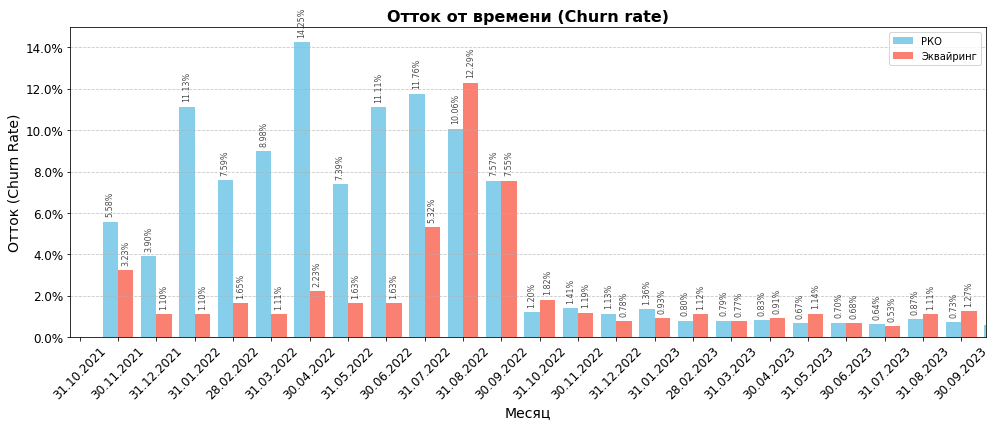

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(14, 6))

# Построение графика для каждого датасета
ax = churn_rate_rko.plot(kind='bar', color='skyblue', label='РКО', width=0.4, position=1)
churn_rate_aq.plot(kind='bar', color='salmon', ax=ax, label='Эквайринг', width=0.4, position=0)

# Настройки заголовка и подписей осей
plt.title('Отток от времени (Churn rate)', fontsize=16, fontweight='bold')
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Отток (Churn Rate)', fontsize=14)

# Поворот и форматирование подписей на оси X
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Добавление сетки для удобства восприятия
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Форматирование значений оси Y в проценты
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Добавление легенды
plt.legend()

# Настройка отступов графика
plt.tight_layout()

# Добавление аннотаций на график
for i, p in enumerate(ax.patches):
    # Поднять текст аннотации, чередуя положение над и под столбцом
    offset = (0, 5) if i % 2 == 0 else (0, 5)
    height = p.get_height()
    if height > 0:  # Аннотировать только ненулевые значения
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=offset, textcoords='offset points', fontsize=8, rotation=90, alpha=0.7)

plt.show()


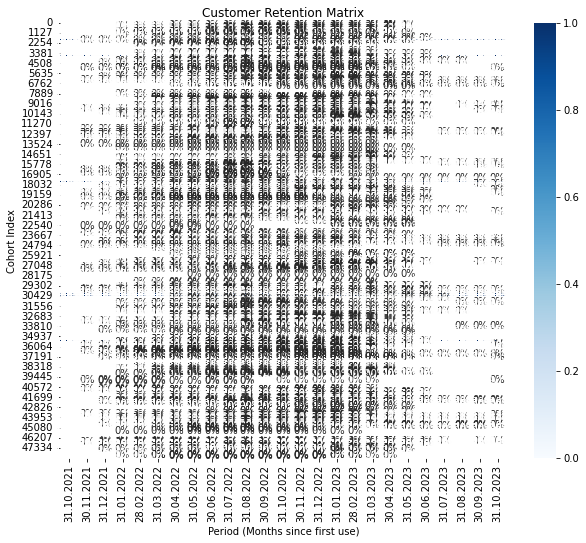

In [68]:
df_int = rko_data_bool * 1

# Calculate the retention rate
# Divide each period's active users by the cohort size (which is the number of users in the first period)
cohort_sizes = df_int.iloc[:, 0]  # Assuming the first period represents the cohort size
retention_matrix = df_int.div(cohort_sizes, axis=0)

# Plot the retention matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', vmin=0, vmax=1)
plt.title('Customer Retention Matrix')
plt.ylabel('Cohort Index')
plt.xlabel('Period (Months since first use)')
plt.yticks(rotation=0)  # Ensure the y-axis labels are horizontal for better readability
plt.show()

In [82]:
rko_data_bool.columns

Index(['31.10.2021', '30.11.2021', '31.12.2021', '31.01.2022', '28.02.2022',
       '31.03.2022', '30.04.2022', '31.05.2022', '30.06.2022', '31.07.2022',
       '31.08.2022', '30.09.2022', '31.10.2022', '30.11.2022', '31.12.2022',
       '31.01.2023', '28.02.2023', '31.03.2023', '30.04.2023', '31.05.2023',
       '30.06.2023', '31.07.2023', '31.08.2023', '30.09.2023', '31.10.2023'],
      dtype='object')

In [104]:
retention_rate_df = pd.DataFrame()
rr_base = aq_data_bool
for retention_timeframe_months in range(1,12):
    retention_rate = pd.Series(index=rr_base.columns)
    # Calculating the retention rate for each month
    for i in range(2, len(rr_base.columns) - retention_timeframe_months):
        prev_prev_month = rr_base.columns[i - 1]
        current_month = rr_base.columns[i]
        future_month = rr_base.columns[i + retention_timeframe_months]
        
        new_users = ~rr_base[prev_prev_month] & rr_base[current_month]
        lost_future_month_count = (new_users & ~rr_base[future_month]).sum()


        retention_rate[current_month] = (new_users.sum() - lost_future_month_count) / new_users.sum() 
    retention_rate_df[retention_timeframe_months] = retention_rate
# Displaying the first few values of the retention rate for validation
retention_rate_df.head()

/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1833863452.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  retention_rate = pd.Series(index=rr_base.columns)
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1833863452.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  retention_rate = pd.Series(index=rr_base.columns)
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1833863452.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  retention_rate = pd.Series(index=rr_base.columns)
/var/folders/y1/9sxh1fh15_q6bvblpc_zqcrh0000gn/T/ipykernel_49286/1833863452.py:4: FutureWarning: The default dtype 

,1,2,3,4,5,6,7,8,9,10,11
31.10.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30.11.2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.12.2021,1.0,1.0,0.5,0.5,0.5,0.500000,0.500000,0.0,0.0,0.0,0.0
31.01.2022,1.0,1.0,1.0,1.0,1.0,0.666667,0.333333,0.0,0.0,0.0,0.0
28.02.2022,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0


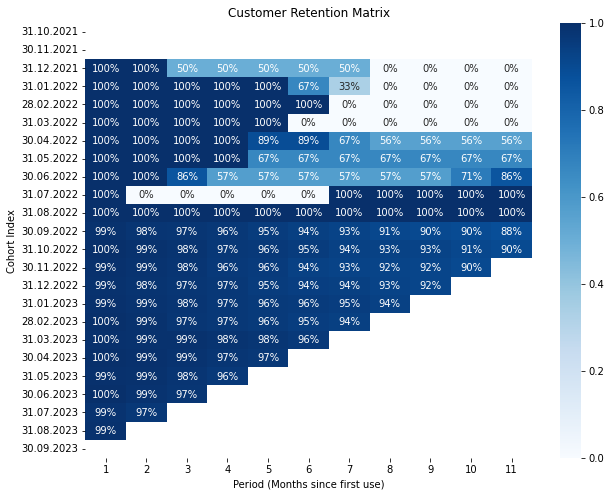

In [105]:

# Plot the retention matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(retention_rate_df, annot=True, fmt='.0%', cmap='Blues', vmin=0, vmax=1)
plt.title('Customer Retention Matrix')
plt.ylabel('Cohort Index')
plt.xlabel('Period (Months since first use)')
plt.yticks(rotation=0)  # Ensure the y-axis labels are horizontal for better readability
plt.show()

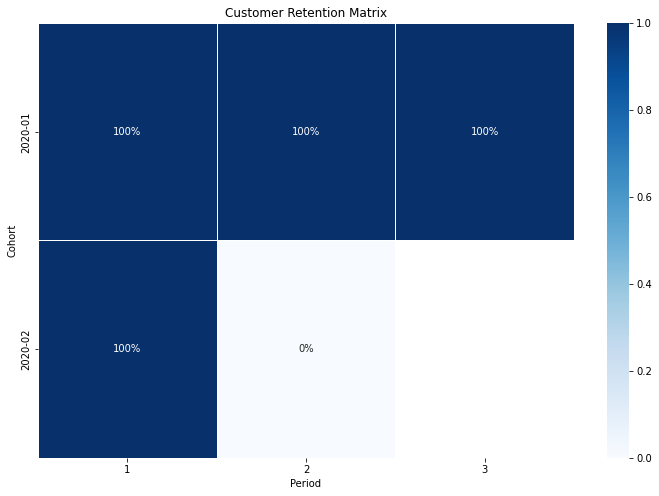

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data preparation
# Assume df is your DataFrame with 'cohort' and 'period' columns
# where 'cohort' is the cohort identifier and 'period' is the nth period since the first use.

# Example DataFrame structure
df = pd.DataFrame({
    'cohort': ['2020-01', '2020-01', '2020-02', '2020-02', '2020-01'],
    'period': [1, 2, 1, 2, 3],
    'is_active': [True, True, True, False, True]
})

# Create the retention matrix
retention_matrix = df.pivot_table(index='cohort', columns='period', values='is_active', aggfunc='mean')

# Plot the retention matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', linewidths=.5)
plt.title('Customer Retention Matrix')
plt.ylabel('Cohort')
plt.xlabel('Period')
plt.show()


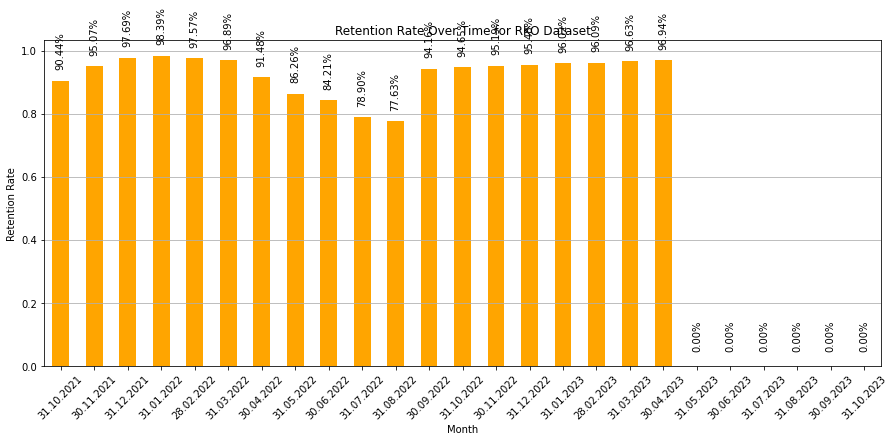

In [64]:
# Plotting the retention rate over time with data point values
plt.figure(figsize=(15, 6))
ax = retention_rate.plot(kind='bar', color='orange')
plt.title('Retention Rate Over Time for RKO Dataset')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data point values on the graph
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 30), rotation=90, textcoords='offset points')

plt.show()


In [26]:
# Filtering the general dataset to include only clients who have used the RKO product
rko_used_clients = general_data[general_data['rko'] > 0]

# Merging the RKO dataset with the filtered general data on client ID
merged_rko_data = pd.merge(rko_data, rko_used_clients[['клиент', 'ОКВЭД, основная деятельность']], 
                           on='клиент', how='inner')
merged_rko_data["ОКВЭД, основная деятельность"].value_counts()

47.91       3025
49.41       2982
41.20       2363
46.90       1724
47.11       1387
            ... 
71.12.45       1
87.20          1
52.23.11       1
28.22          1
47.79.2        1
Name: ОКВЭД, основная деятельность, Length: 1219, dtype: int64

In [ ]:

# Filtering for clients in the top 5 ОКВЭД categories who have used RKO
top_okved_rko_clients = merged_rko_data[merged_rko_data['ОКВЭД, основная деятельность'].isin(top_okveds.index)]

# Plotting CR and RR for each top ОКВЭД among RKO users
for okved in top_okveds.index:
    okved_rko_data = top_okved_rko_clients[top_okved_rko_clients['ОКВЭД, основная деятельность'] == okved]
    okved_rko_data_bool = okved_rko_data[date_columns] > 0

    churn_rates, retention_rates = calculate_churn_retention(okved_rko_data_bool, date_columns)
    
    plot_metrics(churn_rates, f'Churn Rate for ОКВЭД {okved} (RKO Users)', 'Churn Rate', date_columns)
    plot_metrics(retention_rates, f'Retention Rate for ОКВЭД {okved} (RKO Users)', 'Retention Rate', date_columns)
